### LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
### LGMVIP june-22
### AUTHOR - Vishva Dadhaniya
### Intermediate Level Task
### TASK-6- Prediction using Decision Tree Algorithm :

#### Importing Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

#### Loading the Dataset & Reading the Dataset

In [2]:
# Loading the Dataset
# Reading the Dataset
data=pd.read_csv("Iris.csv")
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [3]:
data.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
2,4.7,3.2,1.3,0.2,Setosa
31,5.4,3.4,1.5,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
45,4.8,3.0,1.4,0.3,Setosa
60,5.0,2.0,3.5,1.0,Versicolor
93,5.0,2.3,3.3,1.0,Versicolor
142,5.8,2.7,5.1,1.9,Virginica
135,7.7,3.0,6.1,2.3,Virginica
26,5.0,3.4,1.6,0.4,Setosa
91,6.1,3.0,4.6,1.4,Versicolor


In [4]:
data.shape

(150, 5)

In [5]:
# Dataset Columns
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [6]:
#Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Dataset Statistical Summary
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking Null Values
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [10]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [13]:
#Checking columns count of "variety "
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

### Data Visualization

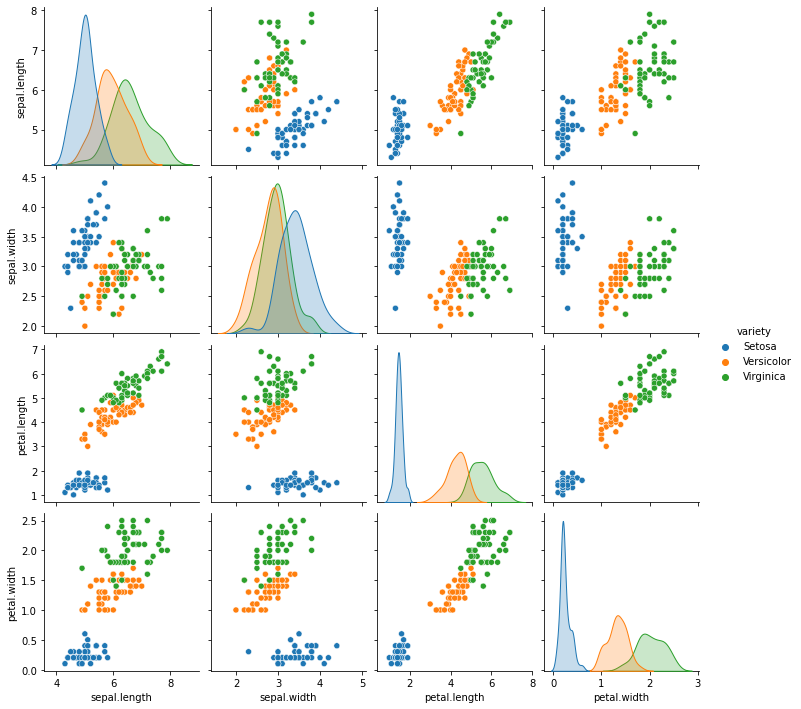

In [14]:
sns.pairplot(data,hue='variety')

<AxesSubplot:xlabel='sepal.width', ylabel='petal.width'>

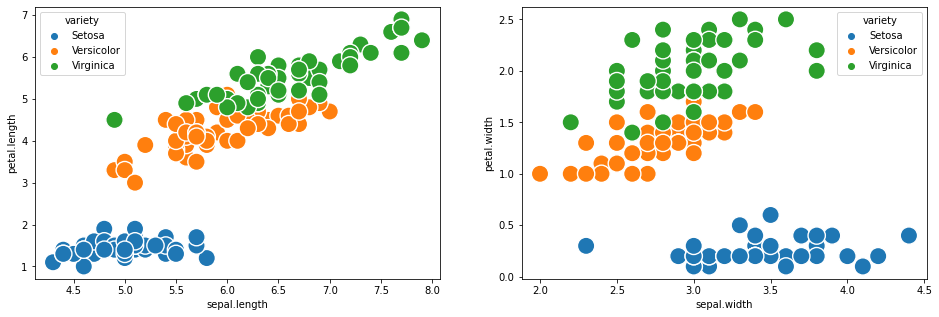

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal.length',y='petal.length',data=data,hue='variety',ax=ax1,s=300,marker='o')
sns.scatterplot(x='sepal.width',y='petal.width',data=data,hue='variety',ax=ax2,s=300,marker='o')

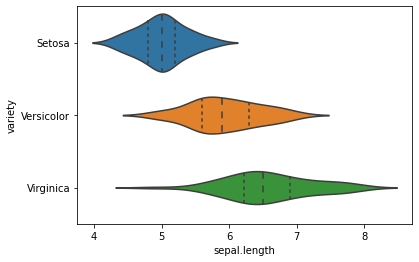

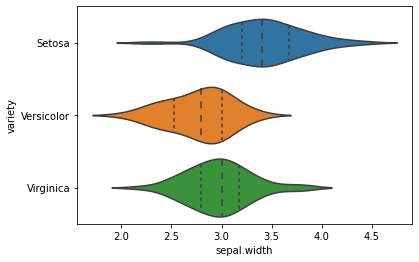

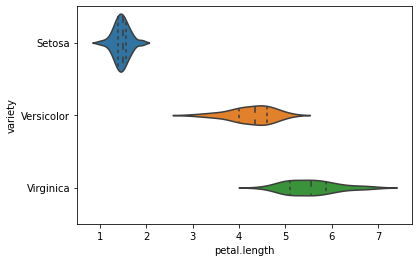

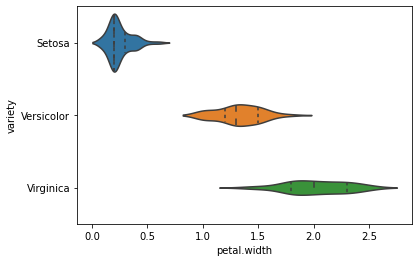

In [17]:
sns.violinplot(y='variety', x='sepal.length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='variety', x='sepal.width', data=data, inner='quartile')
plt.show()
sns.violinplot(y='variety', x='petal.length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='variety', x='petal.width', data=data, inner='quartile')
plt.show()

<AxesSubplot:ylabel='variety'>

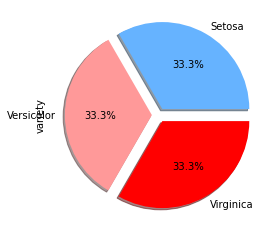

In [19]:
#Pie plot to show the overall types of Iris classifications
colors = ['#66b3ff','#ff9999','red']
data['variety'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

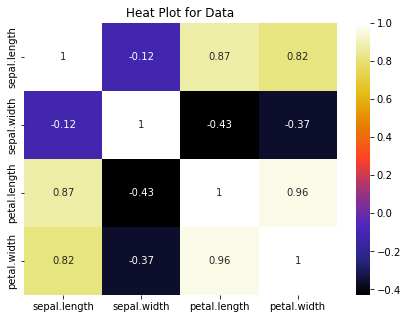

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [22]:
features = ['sepal.length','sepal.width','petal.length','petal.width']
X = data.loc[:, features].values   #defining the feature matrix
y = data.variety

In [23]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(697.5, 1245.75, 'petal length(cm) <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Virginica'),
 Text(558.0, 1019.25, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(837.0, 1019.25, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Virginica'),
 Text(558.0, 792.75, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Versicolor'),
 Text(418.5, 566.25, 'sepal length(cm) <= 5.0\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Versicolor'),
 Text(279.0, 339.75, 'sepal width(cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(139.5, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(418.5, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(558.0, 339.75, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Versicolor'),
 Text(697.5, 566.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0,

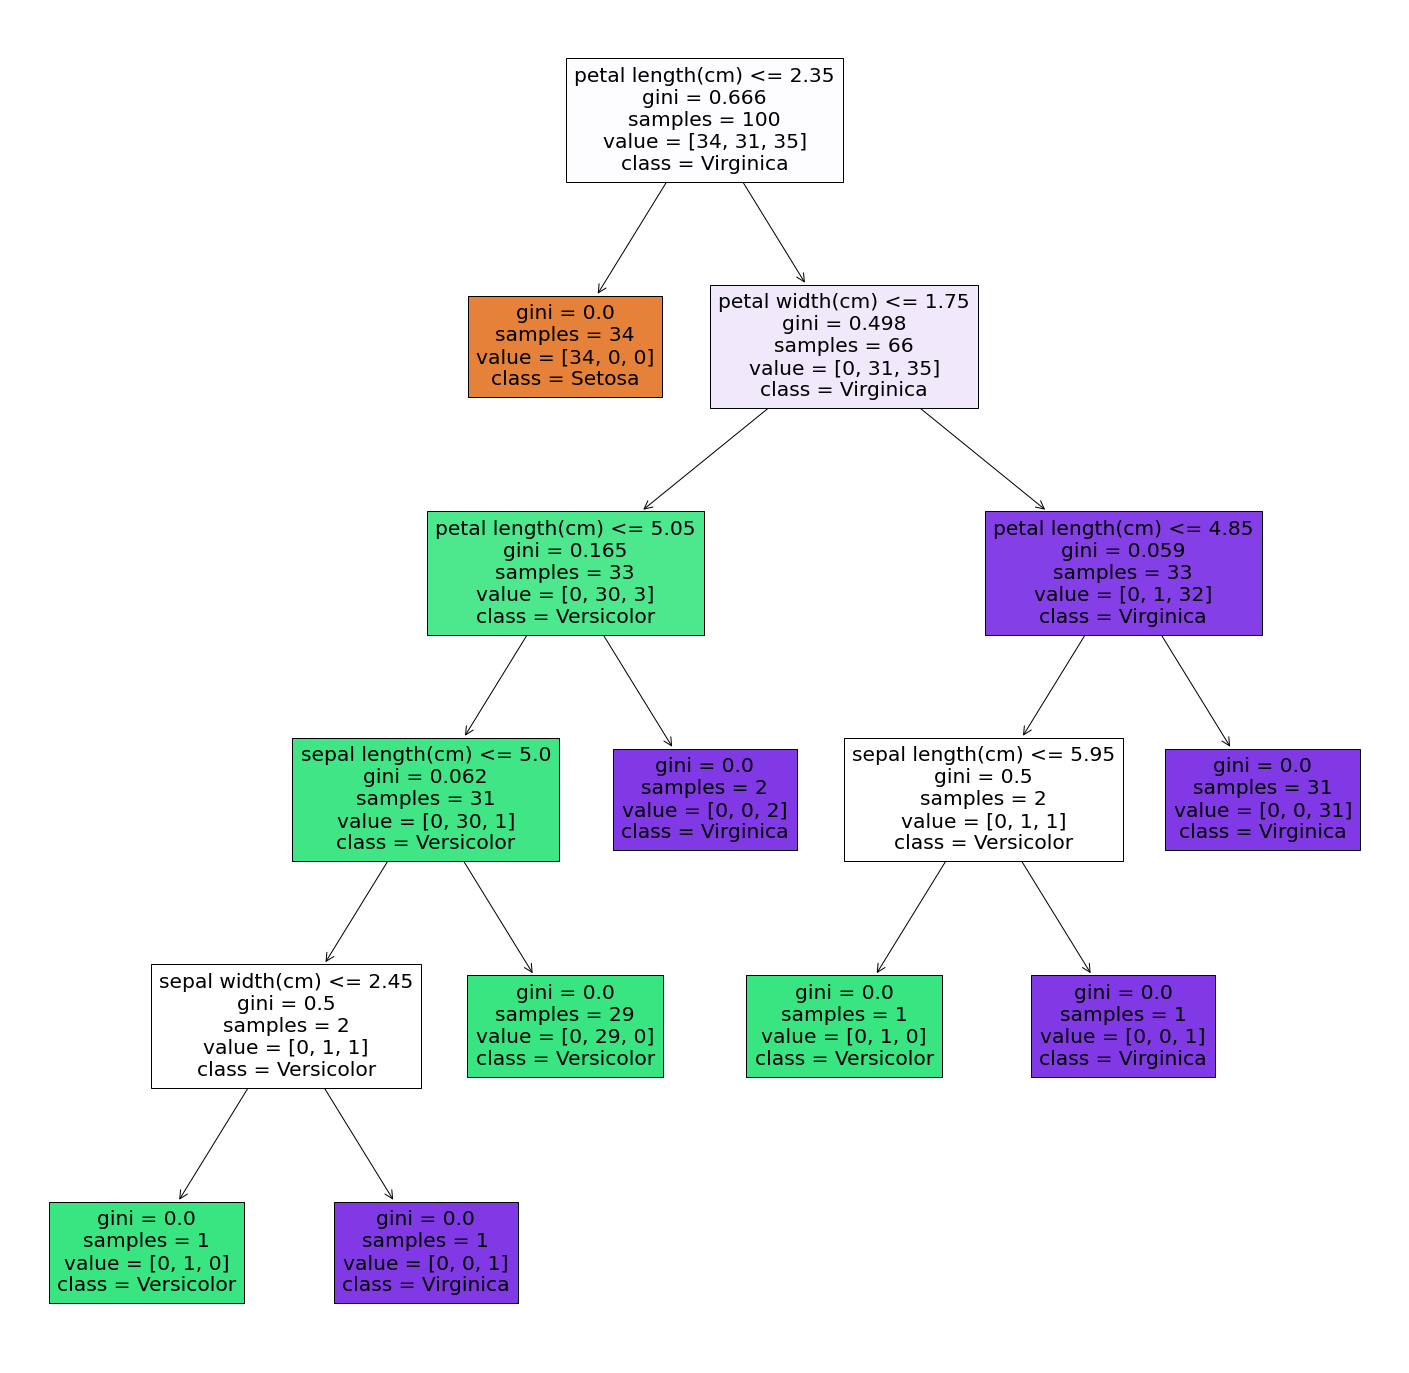

In [26]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= data.variety.unique()
plt.figure(figsize=(25,25))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

### Prediction on test data

In [27]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Virginica'], dtype=object)

### Checking the accuracy of the model

In [28]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96
